In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn
import numpy as np

In [2]:
df=sn.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'],axis=1)
y=df['species']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [91]:
print(x_train.size)
print(x_train.shape)

480
(120, 4)


In [92]:
print(x_test.size)
print(x_test.shape)

120
(30, 4)


In [93]:
print(y_train.size)
print(y_train.shape)

120
(120,)


In [94]:
print(y_test.size)
print(y_test.shape)

30
(30,)


In [11]:
#Gaussian - Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [12]:
NB.score(x_test,y_test)

0.9666666666666667

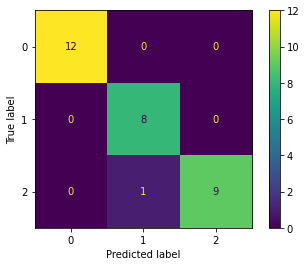

In [81]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(NB.predict(x_test),y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
cm_display.plot()
pt.show()

In [82]:
metrics.confusion_matrix(NB.predict(x_test),y_test)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [83]:
metrics.accuracy_score(NB.predict(x_test),y_test)

0.9666666666666667

In [85]:
metrics.precision_score(NB.predict(x_test),y_test,average='macro')

0.9629629629629629

In [86]:
metrics.recall_score(NB.predict(x_test),y_test,average='macro')

0.9666666666666667

In [87]:
metrics.f1_score(NB.predict(x_test),y_test,average='macro')

0.9628482972136223

In [88]:
metrics.mean_squared_error(NB.predict(x_test),y_test)

0.03333333333333333

In [89]:
metrics.r2_score(NB.predict(x_test),y_test)

0.9542682926829268

In [63]:
#Bernolli-Naive Bayes
from sklearn.naive_bayes import BernoulliNB
NB1=BernoulliNB()
NB1.fit(x_train,y_train)

BernoulliNB()

In [64]:
NB1.score(x_test,y_test)

0.3

In [65]:
from sklearn import metrics
metrics.accuracy_score(NB1.predict(x_test),y_test)

0.3

In [66]:
from sklearn.metrics import confusion_matrix,recall_score
confusion_matrix(NB1.predict(x_test),y_test)

array([[ 0,  0,  0],
       [12,  9,  9],
       [ 0,  0,  0]], dtype=int64)

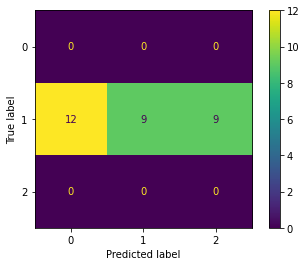

In [67]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(NB1.predict(x_test),y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
cm_display.plot()
pt.show()

In [68]:
metrics.confusion_matrix(NB1.predict(x_test),y_test)

array([[ 0,  0,  0],
       [12,  9,  9],
       [ 0,  0,  0]], dtype=int64)

In [69]:
metrics.r2_score(NB1.predict(x_test),y_test)

0.0

In [70]:
metrics.precision_score(NB1.predict(x_test),y_test,average='macro')

0.3333333333333333

In [71]:
metrics.recall_score(NB1.predict(x_test),y_test,average='macro')

C:\Users\91630\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.09999999999999999

In [72]:
#multinomial
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(x_train,y_train)

MultinomialNB()

In [73]:
MNB.score(x_test,y_test)

0.9666666666666667

In [74]:
from sklearn import metrics
metrics.confusion_matrix(MNB.predict(x_test),y_test)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

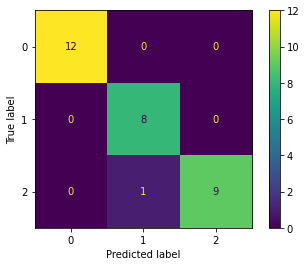

In [75]:
#confusion matrix
from sklearn import metrics
import matplotlib.pyplot as pt
cm=metrics.confusion_matrix(MNB.predict(x_test),y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
cm_display.plot()
pt.show()

In [76]:
metrics.accuracy_score(MNB.predict(x_test),y_test)

0.9666666666666667

In [77]:
metrics.recall_score(MNB.predict(x_test),y_test,average='macro')

0.9666666666666667

In [78]:
metrics.f1_score(MNB.predict(x_test),y_test,average='macro')

0.9628482972136223

In [79]:
metrics.precision_score(MNB.predict(x_test),y_test,average='macro')

0.9629629629629629